In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# ICE Bank Of America Merryl Lynch High Yield Master II -Option Adjusted Spread

Statistics to forecast financial S&P 500 index, drawing the indicator: ICE BofAML US High Yield Master II Option-Adjusted Spread.

In [2]:
# Load data
from google.colab import files
uploaded = files.upload()

Saving BAMLH0A0HYM2.csv to BAMLH0A0HYM2.csv


In [0]:
# Read Data
ice_data = pd.read_csv('BAMLH0A0HYM2.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
ice_data['price'] = pd.to_numeric(ice_data.BAMLH0A0HYM2, errors='coerce')

# Remove NA's
ice_data.dropna(inplace=True)

In [4]:
ice_data.head()

,DATE,BAMLH0A0HYM2,price
0,2014-04-03,3.64,3.64
1,2014-04-04,3.68,3.68
2,2014-04-07,3.72,3.72
3,2014-04-08,3.73,3.73
4,2014-04-09,3.74,3.74


## Time Series plot of Option Adjusted Spread

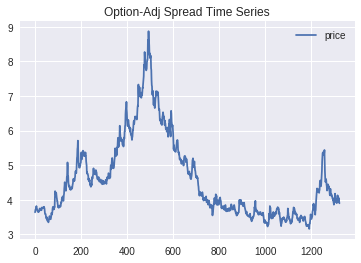

In [5]:
ice_data.plot()
plt.title('Option-Adj Spread Time Series')
plt.show()

In [6]:
ice_data.shape

(1306, 3)

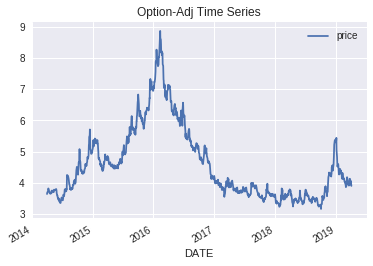

In [7]:
# With time index
ice_data.index = pd.to_datetime(ice_data.DATE)
ice_data.plot()
plt.title('Option-Adj Time Series')
plt.show()

### Difference plot of Stationary dataset

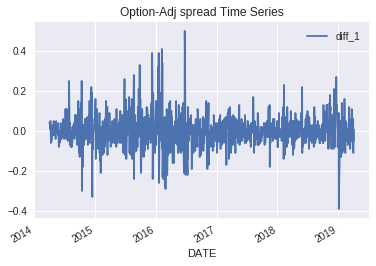

In [8]:
ice_data['diff_1'] = ice_data.price - ice_data.price.shift()
ice_data.plot(y='diff_1')
plt.title('Option-Adj spread Time Series')
plt.show()

### PACF for Time series

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5, 1.0, 'OAS PACF')

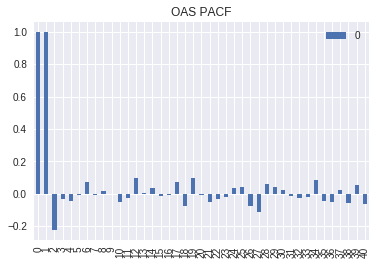

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(ice_data.price))
x_acf.plot(kind='bar')
plt.title("OAS PACF")

We can see above that there is 1 strong autocorrelation

### PACF for difference

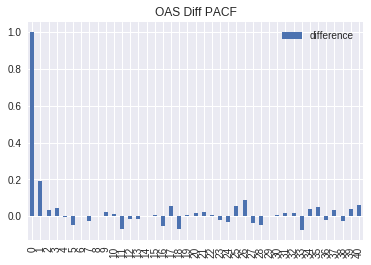

In [10]:
x_acf = pd.DataFrame(pacf(ice_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("OAS Diff PACF")
plt.legend(['difference'])

We see that there is some correlations 

## ARIMA models

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(ice_data.price, order=(1,0,1))
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())
print('Residuals Description')
print(model_fit1.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1306
Model:                     ARMA(1, 1)   Log Likelihood                1488.142
Method:                       css-mle   S.D. of innovations              0.077
Date:                Fri, 05 Apr 2019   AIC                          -2968.284
Time:                        01:01:02   BIC                          -2947.585
Sample:                    04-03-2014   HQIC                         -2960.519
                         - 04-03-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3202      0.621      6.961      0.000       3.104       5.537
ar.L1.price     0.9966      0.002    505.208      0.000       0.993       1.000
ma.L1.price     0.1784      0.026      6.817    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'Histogram of Residuals')

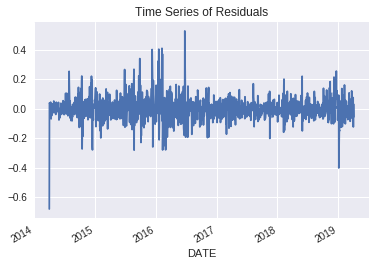

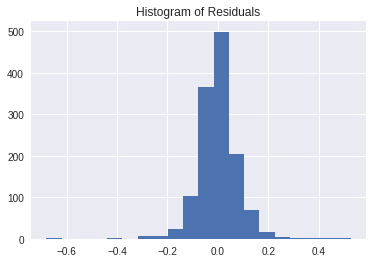

In [12]:
residuals1 = pd.DataFrame(model_fit1.resid)

residuals1.plot(legend=False)
plt.title('Time Series of Residuals')

residuals1.hist(bins=20)
plt.title('Histogram of Residuals')

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(ice_data.price, order=(1,0,0))
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())
print('Residuals Description')
print(model_fit2.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1306
Model:                     ARMA(1, 0)   Log Likelihood                1465.680
Method:                       css-mle   S.D. of innovations              0.079
Date:                Fri, 05 Apr 2019   AIC                          -2925.360
Time:                        01:01:10   BIC                          -2909.835
Sample:                    04-03-2014   HQIC                         -2919.536
                         - 04-03-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2761      0.667      6.410      0.000       2.969       5.584
ar.L1.price     0.9974      0.002    601.268      0.000       0.994       1.001
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'Histogram of Residuals')

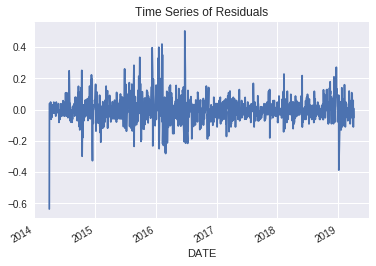

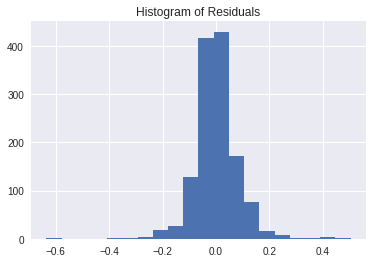

In [14]:
residuals2 = pd.DataFrame(model_fit2.resid)

residuals2.plot(legend=False)
plt.title('Time Series of Residuals')

residuals2.hist(bins=20)
plt.title('Histogram of Residuals')

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(ice_data.price, order=(1,2,3))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())
print('Residuals Description')
print(model_fit3.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.price   No. Observations:                 1304
Model:                 ARIMA(1, 2, 3)   Log Likelihood                1484.147
Method:                       css-mle   S.D. of innovations              0.077
Date:                Fri, 05 Apr 2019   AIC                          -2956.294
Time:                        01:01:18   BIC                          -2925.255
Sample:                    04-07-2014   HQIC                         -2944.649
                         - 04-03-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.528e-06   8.48e-06     -0.652      0.514   -2.21e-05    1.11e-05
ar.L1.D2.price    -0.8622      0.115     -7.479      0.000      -1.088      -0.636
ma.L1.D2.price     0.0446      0.117

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'Histogram of Residuals')

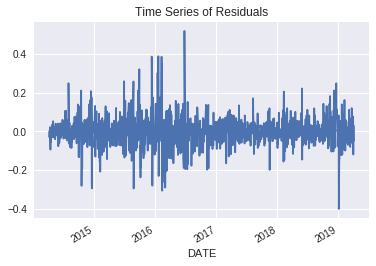

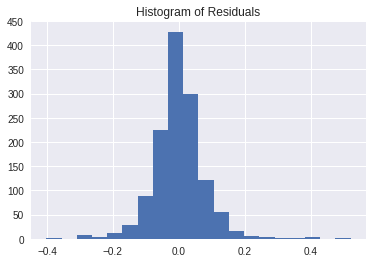

In [16]:
residuals3 = pd.DataFrame(model_fit3.resid)

residuals3.plot(legend=False)
plt.title('Time Series of Residuals')

residuals3.hist(bins=20)
plt.title('Histogram of Residuals')

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model4 = ARIMA(ice_data.price, order=(0,0,1))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())
print('Residuals Description')
print(model_fit4.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1306
Model:                     ARMA(0, 1)   Log Likelihood               -1194.517
Method:                       css-mle   S.D. of innovations              0.603
Date:                Fri, 05 Apr 2019   AIC                           2395.035
Time:                        01:01:26   BIC                           2410.559
Sample:                    04-03-2014   HQIC                          2400.858
                         - 04-03-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5686      0.033    139.323      0.000       4.504       4.633
ma.L1.price     0.9649      0.005    178.915      0.000       0.954       0.976
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'Histogram of Residuals')

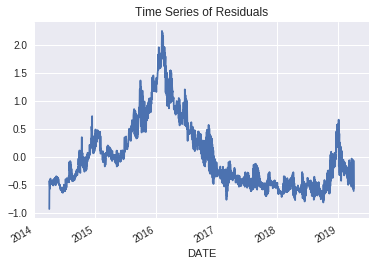

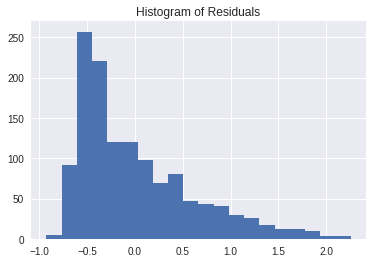

In [18]:
residuals4 = pd.DataFrame(model_fit4.resid)

residuals4.plot(legend=False)
plt.title('Time Series of Residuals')

residuals4.hist(bins=20)
plt.title('Histogram of Residuals')

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model5 = ARIMA(ice_data.price, order=(1,1,1))
model_fit5 = model5.fit(disp=0)
print(model_fit5.summary())
print('Residuals Description')
print(model_fit5.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1305
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1491.488
Method:                       css-mle   S.D. of innovations              0.077
Date:                Fri, 05 Apr 2019   AIC                          -2974.976
Time:                        01:01:34   BIC                          -2954.280
Sample:                    04-04-2014   HQIC                         -2967.212
                         - 04-03-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.003      0.071      0.944      -0.005       0.006
ar.L1.D.price     0.4316      0.130      3.311      0.001       0.176       0.687
ma.L1.D.price    -0.2521      0.140     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'Histogram of Residuals')

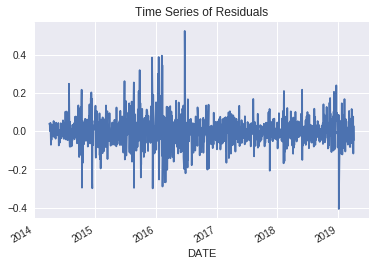

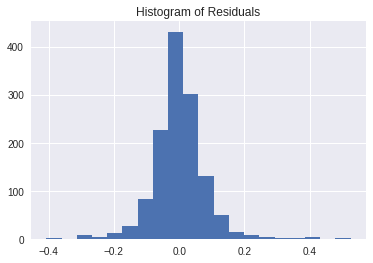

In [20]:
residuals5 = pd.DataFrame(model_fit5.resid)

residuals5.plot(legend=False)
plt.title('Time Series of Residuals')

residuals5.hist(bins=20)
plt.title('Histogram of Residuals')

# Conclusion

All the ARIMA models are not that great. I would like to compare the Log likelyhood of these models to determine which p, d, q parameters are best. If we see the 5 variations, we can observe that the ARIMA (0,0,1) seems to have a log likelyhood nearest to 0. Also for this model we see that the residuals have good variations and also that they are non normal distribution. Consequently, forecasts from this method will probably be quite good, but prediction intervals that are computed assuming a normal distribution may be inaccurate.